In [51]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris
data_dir = os.getcwd()+"/log_data/"
sys.argv = ["file","train.csv", "test.csv", "param_a.txt" ,"outputfile.csv", "weightfile.csv"]

In [52]:

def hotencode_train(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    classDistribution = pd.get_dummies(data[8], prefix="class")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health, classDistribution], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom',
            'class_not_recom', 'class_recommend', 'class_very_recom', 'class_priority', 'class_spec_prior']

    return train[pd.Index(cols)]

def hotencode_test(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom']
    return train[pd.Index(cols)]

In [16]:
X, y = load_iris(return_X_y=True)

In [18]:
X.shape

(150, 4)

In [53]:

train_data = pd.read_csv(data_dir+sys.argv[1], header=None)
# test_data = pd.read_csv(data_dir+sys.argv[2], header=None)
train = hotencode_train(train_data)
# test = hotencode_test(test_data)
classes = np.copy(train.iloc[:, -5:].values)
features = np.copy(train.iloc[:, :-5].values)
# features = np.c_[np.ones(len(train)), features]

# X_train[:,21]=0
# features = test.iloc[:, :].values
# features = np.c_[np.ones(len(test)), features]
# X_test = features[:, :]
# X_test[:,21]=0


In [24]:
np.multiply(classes,np.array([0,1,2,3,4]))

array([[0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0],
       ...,
       [0, 0, 0, 3, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [54]:
X_train = features
Y_train = np.sum(np.multiply(classes,np.array([1,2,3,4,5])),axis=1)
print(X_train.shape, Y_train.shape)

(6000, 27) (6000,)


In [46]:
Y_train.tolist()

[4,
 1,
 4,
 4,
 5,
 5,
 5,
 1,
 1,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 1,
 5,
 5,
 4,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 4,
 5,
 5,
 1,
 5,
 4,
 4,
 5,
 1,
 4,
 3,
 4,
 4,
 4,
 5,
 1,
 1,
 5,
 4,
 5,
 5,
 5,
 5,
 1,
 4,
 4,
 5,
 4,
 1,
 1,
 1,
 1,
 4,
 5,
 4,
 5,
 5,
 1,
 1,
 4,
 3,
 1,
 5,
 5,
 1,
 1,
 5,
 4,
 5,
 1,
 5,
 4,
 5,
 4,
 4,
 4,
 1,
 5,
 4,
 1,
 5,
 5,
 1,
 5,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 1,
 4,
 5,
 4,
 1,
 1,
 1,
 4,
 4,
 5,
 1,
 4,
 5,
 1,
 1,
 5,
 5,
 5,
 4,
 1,
 5,
 4,
 5,
 5,
 1,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 5,
 5,
 5,
 1,
 1,
 4,
 1,
 1,
 5,
 4,
 5,
 5,
 5,
 4,
 1,
 4,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 4,
 5,
 4,
 5,
 1,
 4,
 1,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 1,
 5,
 5,
 4,
 5,
 4,
 1,
 5,
 5,
 4,
 4,
 1,
 1,
 1,
 1,
 5,
 4,
 5,
 1,
 1,
 1,
 4,
 4,
 5,
 5,
 1,
 4,
 3,
 5,
 5,
 3,
 5,
 4,
 1,
 4,
 4,
 1,
 1,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 1,
 5,
 4,
 5,
 4,
 5,
 1,
 1,


In [55]:
clf = LogisticRegressionCV(cv=5,random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train[:5400,:], Y_train[:5400])
Y_pred = clf.predict(X_train[5400:,:])


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incr

ValueError: could not broadcast input array from shape (10,4,28) into shape (10)

In [48]:
Y_train.shape

(6000,)

In [49]:
Y_train[:5400,:]

IndexError: too many indices for array

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train[5400:], Y_pred)

array([[186,   0,   0,   0],
       [  0,   9,   6,   0],
       [  0,   1, 194,  20],
       [  0,   0,  19, 165]])

In [31]:
clf.score(X_train, Y_train)

0.924

In [2]:
data_dir = os.getcwd()+"/data/train.csv"

In [3]:
trainDf= pd.read_csv(data_dir,header=None)
trainDf[246] = trainDf[245]
trainDf[245] = np.ones(30000)
trainDf.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,43.437500,75.562500,0.0,634.0,20.0,16.000000,44.562500,0.0,473.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,47.781250,93.750000,1.0,598.0,7.5,17.859375,56.875000,0.0,594.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0
2,2.273438,4.984375,0.0,44.0,1.0,1.029297,3.003906,0.0,37.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,10.148438,32.406250,0.0,292.0,0.0,5.152344,20.453125,0.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.285156,8.414062,0.0,102.0,1.0,0.973633,4.722656,0.0,93.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

In [4]:
print(X.shape,Y.shape)

NameError: name 'X' is not defined

In [20]:
X_train = trainDf.iloc[:,:-1].values
Y_train = trainDf.iloc[:,246].values
X_test = trainDf.iloc[25000:,:-1].values
Y_test = trainDf.iloc[25000:,246].values
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(30000, 246) (30000,) (5000, 246) (5000,)


In [9]:
test = SelectKBest(score_func=chi2, k=4)
fit  = test.fit(X_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, Y_train)

print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

In [21]:
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
score = np.array(model.feature_importances_)

In [32]:
score[52]

0.09686246402996249

In [31]:
# df = pd.DataFrame(np.flip(np.argsort(score)))
df = pd.DataFrame(score)
# np.argsort(np.array(model.feature_importances_))
df

,0
0,0.004670
1,0.006477
2,0.000750
3,0.012223
4,0.008678
5,0.009707
6,0.004113
7,0.000336
8,0.006183
9,0.010618


In [23]:
np.flip(np.argsort(np.array(model.feature_importances_)))

array([ 52,  45,  44,  47,  46,  53, 234, 235, 233,   3, 232,  48, 230,
        49, 231,  18,  51,   9,  12,  16,   5,   4, 240, 239,  50, 237,
        10, 236,  21, 238, 202, 181, 132,  58, 106,  60, 137, 196, 183,
       241,   1, 121, 216, 104,   8, 173,  98,  68, 203, 167,  11, 146,
        55,  59,  19,  17, 198,  85, 166,  14, 164, 215,  20, 125, 242,
         0, 200, 138, 154, 158,  15,  81,   6,  13, 214,  38, 170,  37,
        34, 157, 123,  86,  32,  33, 186, 122,  76,  99, 103, 118,  42,
        41,  29,  24, 191, 204, 178, 155, 134,  36,  88, 224,  40,  63,
        26, 210,  23,  28, 116, 105,  22, 135, 117,  30, 141,  94, 140,
       120, 221, 100, 189,  73, 161,  87, 168, 243,  66, 213, 244, 112,
       169,  92, 163, 222, 149,  75, 109, 165,  27, 160, 211, 136, 156,
       179, 102, 218, 228, 219,   2, 217, 142, 176, 195, 111, 197,  39,
       119, 201, 206, 114,  79,  69, 129, 126,  65, 162, 188, 177, 172,
       152, 226, 150,   7, 127, 190, 199, 209,  31, 227, 124, 20

In [91]:
print(X_train.shape,X_test.shape)

(25000, 246) (5000, 246)


In [92]:
np.linalg.det(np.matmul(X_train.transpose(),X_train))

0.0

In [93]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
Y_pred = regressor.predict(X_test)
# Y_pred[np.where(Y_pred<0)]=0

In [95]:
np.mean(abs(Y_pred-Y_test))

10.108152718376441

In [96]:
np.linalg.norm(Y_pred-Y_test)

2353.675375922532

In [97]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,0.0,0.963891
1,0.0,-15.315979
2,0.0,12.404966
3,2.0,16.782817
4,6.0,26.683395
5,0.0,0.310330
6,0.0,3.517039
7,0.0,-3.481832
8,0.0,-3.858342
9,0.0,-4.862650


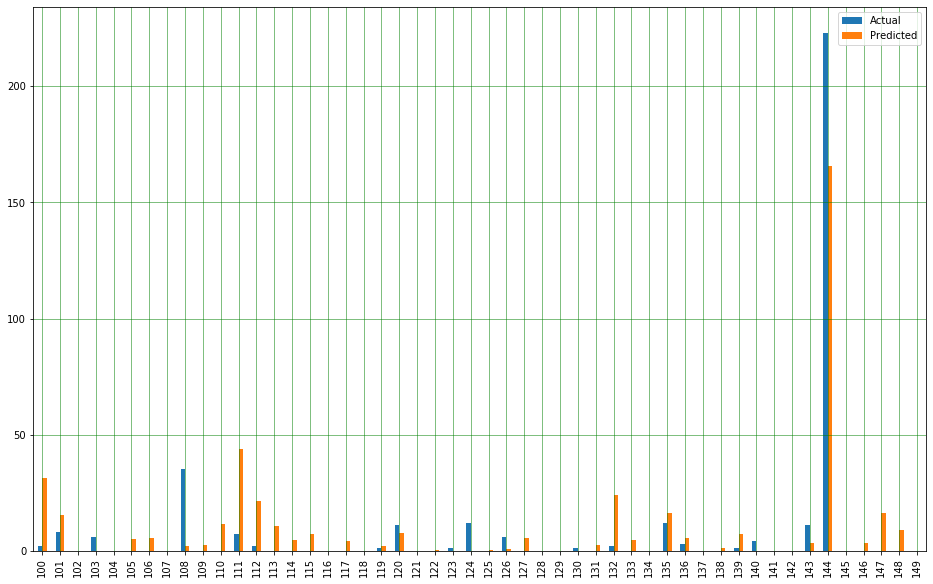

In [77]:
df1 = df[100:150]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

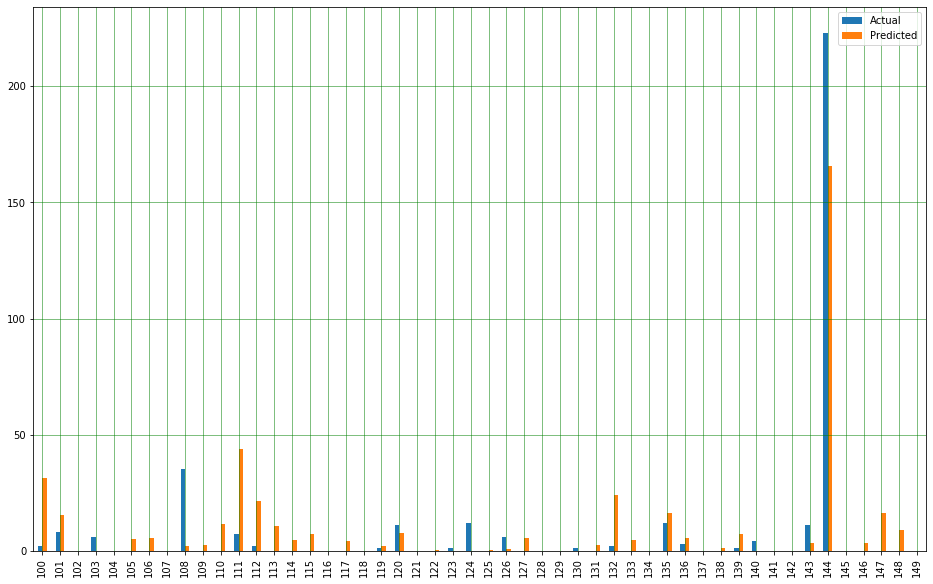

In [79]:
df1 = df[100:150]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [105]:
lamda = [ 1.1**x for x in range(-50,150)]

In [106]:
lamda = [0,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000] 


In [107]:
rr = Ridge()
param = {'alpha':lamda}

In [108]:
ridge_regressor  = GridSearchCV(rr, param,scoring="neg_mean_squared_error" ,cv=10)

In [109]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3,
                                   10, 30, 100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [110]:
ridge_regressor.best_estimator_

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
ridge_regressor.best_score_

-1013.9681388173667